In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# K-Means

- 몆번의 반복으로 데이터셋을 빠르고 효율적으로 클러스터로 묶는 알고리즘
- 1957년 Bell Lab. 스튜어트 로이드(Stuart Lloyd)가 펄스 부호 변조(pulse-code modulation) 기법으로 제안
    - 1982년 외부에 공개
- 1965년 에드워드 포지(Edward W. Forgr)도 동일한 알고리즘 발표
- k-평균을 로이드-포지 알고리즘이라 부름

## k-평균 군집화 알고리즘
- 군집의 중심이 되는 k개 seed 점들을 선택하여 이 seed와 가까운 개체들을 그룹화하는 방법

**알고리즘**
1. k개 중심점(centroid)을 임의로 배치한다
    - 무작위로 k개 샘플을 선택하여 중심점으로 결정
2. 모든 자료와 k개의 중심점과 거리를 계산하여 가장 가까운 중심점의 군집으로 할당한다.
3. 군집의 중심을 구한다(평균을 구한다)
4. 정지 규칙에 이를 때까지 2~3단계를 반복한다
    - 군집의 변화가 없을 때
    - 중심점의 이동이 임계값 이하일 때

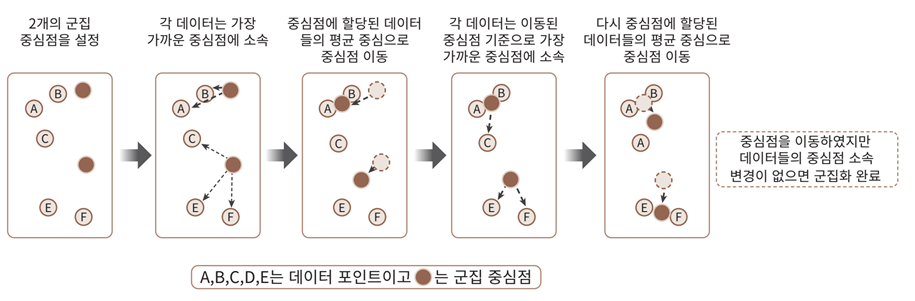

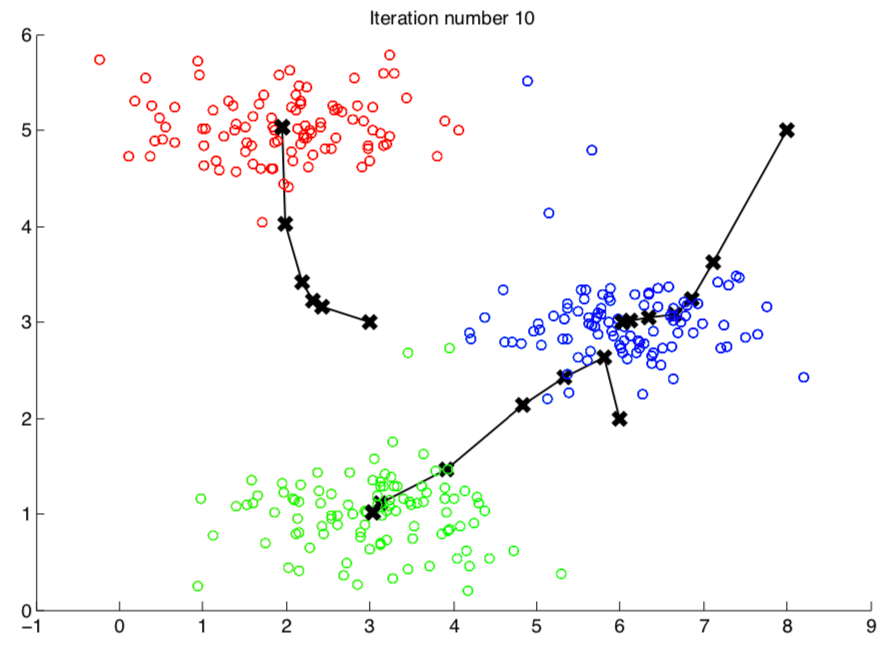

## K-평균 장점과 단점
- **장점**
    - 일반적인 군집화에서 가장 많이 활용되는 알고리즘
    - 알고리즘이 쉽고 간결
    
    
- **단점**
    - 거리 기반 알고리즘으로 속성의 개수가 많을 경우 군집화 정확도가 떨어짐
        - PCA와 같은 차원축소를 적용할 수 있음
    - 반복을 수행하는데 반복 횟수가 많을 경우 수행 시간이 매우 느려짐
    - 몇 개의 클러스터(군집)를 선택해야 할지 가이드하기 어려움

## 사이킷런의 군집 알고리즘 클래스 KMeans
**sklearn.cluster의 `KMeans`**

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**`KMeans` 클래스**

- 기본적으로 최적화된 알고리즘을 적용


- K-평균 초기화 파라미터 중 가장 중요한 파라미터
    - n_clutsers : 클러스터 개수(클러스터 중심점의 개수)
    - init : 초기에 클러스터 중심점 좌표를 설정할 방식
        - 디폴트는 'k-means++'
        - 임의로 중심점을 설정할 경우 'random'
    - max_iter : 최대 반복횟수
        - 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료

#### KMeans 객체의 군집화 적용 메서드

**`fit(X)`** : k-평균 클러스터링을 계산

**`fit_predict(X)`** : 클러스터 중심을 계산하고 각 샘플에 대한 클러스터 인덱스를 예측

**`fit_transform(X)`**  :클러스터링을 계산하고 X를 클러스터 거리 공간으로 변환

#### K-means 결과를 가지고 있는 인스턴스들

**`labels_ 속성`** : 각 샘플에 할당된 레이블(클러스터 인덱스)

**`cluster_centers_ 속성`**: KMeans의 centriods 정보

------

## 실습1. 시뮬레이션 데이터 군집화

; 군집이 5개인 시뮬레이션 데이터를 생성하여 K-Means 군집화 결과 비교

### sklearn.datasets의 군집화를 위한 데이터 생성 API

-  make_blobs() / make_classification()
    - 여러 클래스에 해당하는 데이터 세트를 생성
    - 하나의 클래스에 여러 개의 군집(cluster)이 분포될 수 있게 데이터를 생성
    - 군집과 분류를 위한 테스트 데이터 생성을 위해 사용
    - 두 API의 차이점
        - make_blobs() 
            - 개별 군집의 중심점과 표준편차 제어 기능이 추가되어 있음       
        - make_classification()
            - 노이즈를 포함한 데이터를 만드는데 유용
            
  
- make_circle() / make_moon()
    - 중심 기반의 군집화로 해결하기 어려운 데이터 세트 생성

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

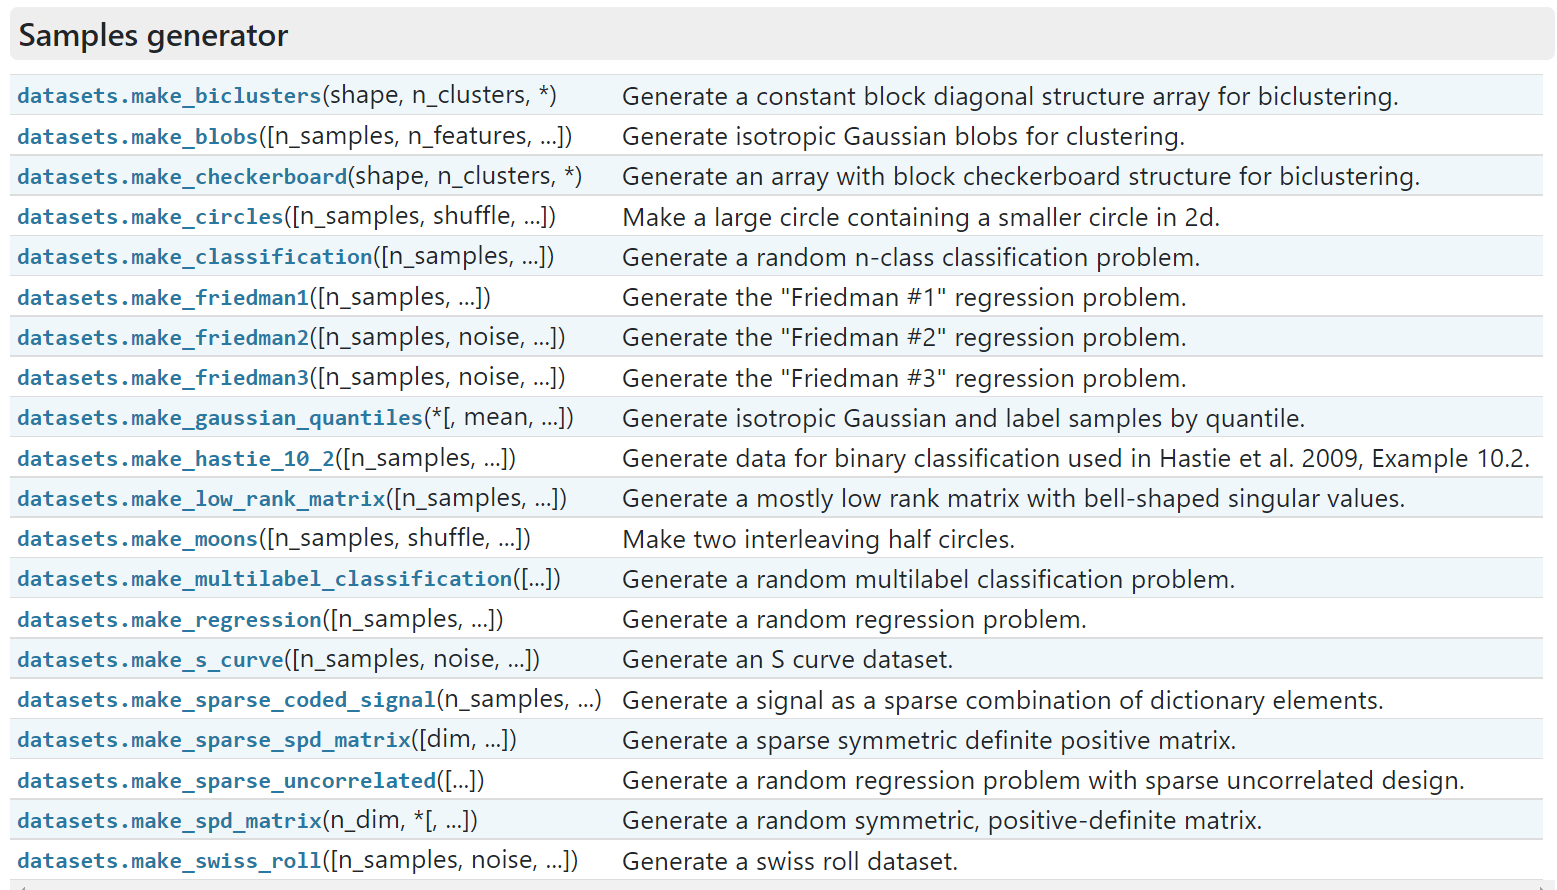

### make_blobs()를 이용한 데이터 생성

#### 모듈 임포트

In [2]:
from sklearn.datasets import make_blobs

#### 5개 군집 데이터셋 생성

- 5개 클러스터 중심을 갖는 2000개 데이터

In [29]:
blob_centers = np.array([[0.2, 2.3],[-1.5, 2.3],[-2.8, 1.8],[-2.8, 2.8],[-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7)
X.shape

(2000, 2)

**생성한 데이터셋의 산점도**

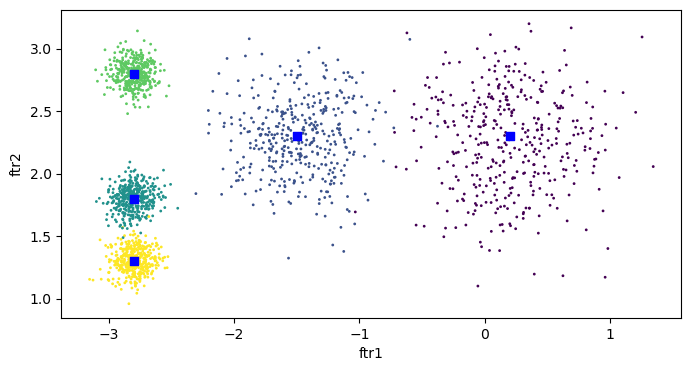

In [30]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], c=y, s=1)
plt.scatter(blob_centers[:,0], blob_centers[:,1], marker='s', color='b')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.show()

### K-means로 군집화

#### k-means를 위한 클래스 임포트

In [5]:
from sklearn.cluster import KMeans

#### k-means 수행

In [6]:
k=5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

In [7]:
y_pred

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

#### labels_ 속성

- 각 샘플에 할당된 레이블(클러스터 인덱스)

In [8]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

#### cluster_centers_ 속성
- KMeans의 centriods 정보

In [9]:
kmeans.cluster_centers_

array([[-0.066884  ,  2.10378803],
       [-2.79290307,  2.79641063],
       [-2.80214068,  1.55162671],
       [-1.47468607,  2.28399066],
       [ 0.47042841,  2.41380533]])

In [10]:
blob_centers

array([[ 0.2,  2.3],
       [-1.5,  2.3],
       [-2.8,  1.8],
       [-2.8,  2.8],
       [-2.8,  1.3]])

#### 군집화 결과 시각화

- 원래 centriod와 군집 결과 생성된 centriod 비교

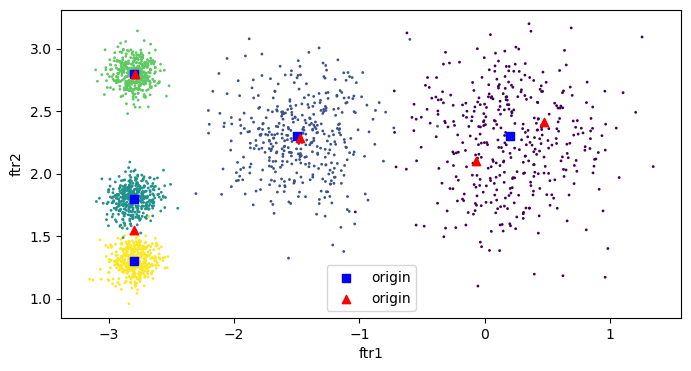

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], c=y, s=1)
plt.scatter(blob_centers[:,0], blob_centers[:,1], marker='s', color='b', label='origin')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', color='r', label='origin')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.legend()
plt.show()

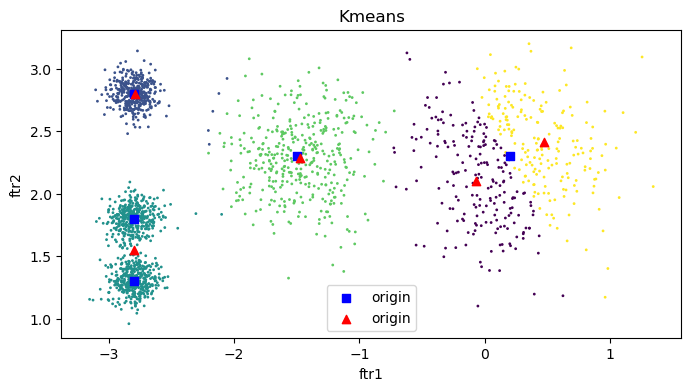

In [12]:
cl = kmeans.labels_
plt.figure(figsize=(8,4))
plt.scatter(X[:,0], X[:,1], c=cl, s=1)
plt.scatter(blob_centers[:,0], blob_centers[:,1], marker='s', color='b', label='origin')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='^', color='r', label='origin')
plt.xlabel('ftr1')
plt.ylabel('ftr2')
plt.title('Kmeans')
plt.legend()
plt.show()

## 실습2. iris dataset 군집화

### 데이터 로드

In [13]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

### K-means 수행

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

#### 군집화 결과 확인

In [15]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

#### 군집 결과 확인

In [16]:
iris_df = pd.DataFrame(data=X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df['target'] = y
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [17]:
iris_df.groupby(['target', 'cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  47           47            47           47
       2                   3            3             3            3
2      0                  14           14            14           14
       2                  36           36            36           36

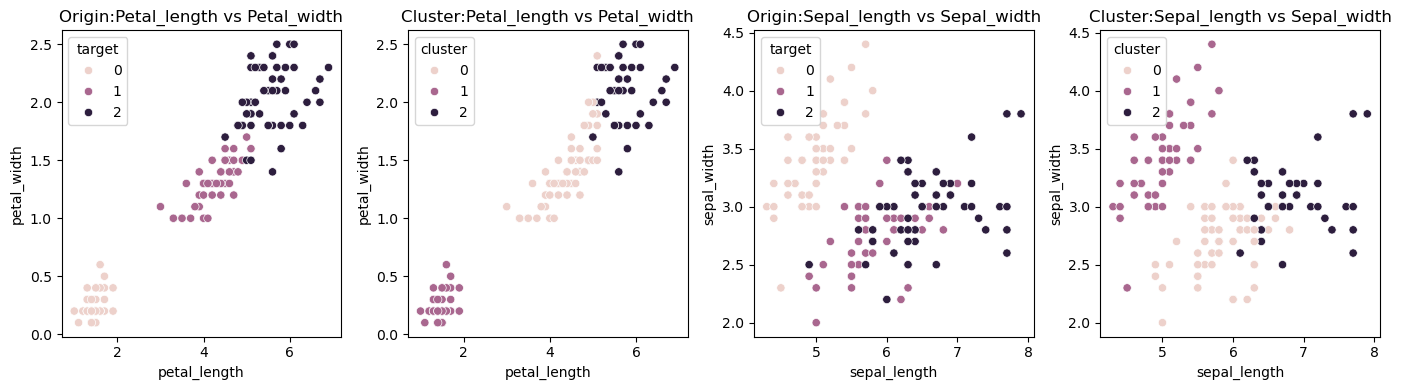

In [18]:
fig, axs = plt.subplots(figsize=(14,4), ncols=4)
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='target', ax=axs[0])
sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='cluster', ax=axs[1])
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='target', ax=axs[2])
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='cluster', ax=axs[3])
axs[0].set_title('Origin:Petal_length vs Petal_width')
axs[1].set_title('Cluster:Petal_length vs Petal_width')
axs[2].set_title('Origin:Sepal_length vs Sepal_width')
axs[3].set_title('Cluster:Sepal_length vs Sepal_width')
plt.tight_layout()
plt.tight_layout()
plt.show()

### PCA로 차원 축소된 붓꽃 데이터의 K-평균 군집화
: 붓꽃 데이터의 4개 피처들을 PCA를 적용하여 2차원으로 축소한 뒤 축소된 두 속성에 대하여 K-평균 군집화 수행

#### PCA로 차원축소

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(X)
iris_df['pca1'] = iris_pca[:,0]
iris_df['pca2'] = iris_pca[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


#### 차원축소한 pca 데이터 시각화

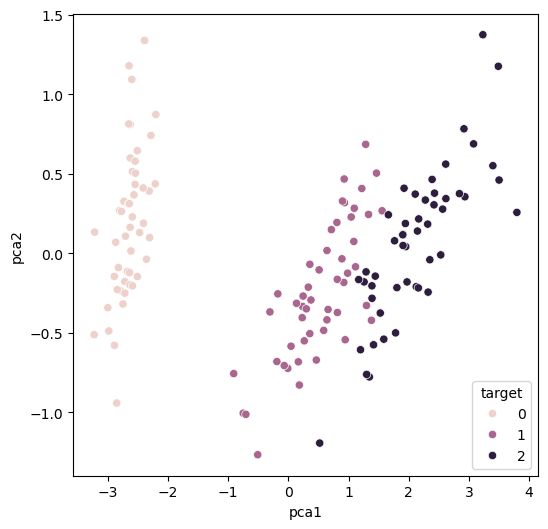

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=iris_df, x='pca1', y='pca2', hue='target')
plt.show()

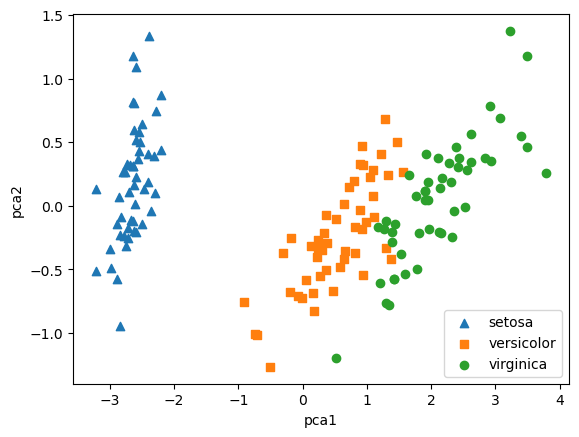

In [21]:
for i, m in enumerate(['^','s','o']):
    plt.scatter(iris_df[iris_df.target==i].pca1,
               iris_df[iris_df.target==i].pca2, 
                marker=m, label=iris.target_names[i])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

#### K-means한 결과를 차원축소한 데이터에 적용하여 시각화

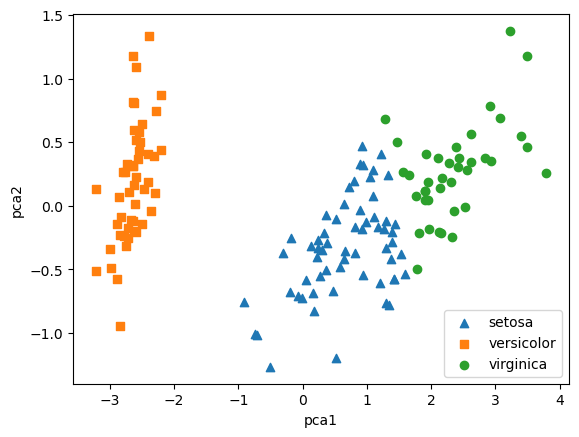

In [22]:
for i, m in enumerate(['^','s','o']):
    plt.scatter(iris_df[iris_df.cluster==i].pca1,
               iris_df[iris_df.cluster==i].pca2, 
                marker=m, label=iris.target_names[i])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

#### 차원축소한 데이터를 K-Means한 결과 시각화

In [23]:
kmeans_pca = KMeans(n_clusters=3, max_iter=300, random_state=0)
kmeans_pca.fit(iris_df.iloc[:,-2:])
kmeans_pca.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
iris_df['pca_cluster'] = kmeans_pca.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca1,pca2,pca_cluster
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,1


In [25]:
iris_df.groupby(['target', 'pca_cluster'])['sepal_length'].count()

target  pca_cluster
0       1              50
1       0              47
        2               3
2       0              14
        2              36
Name: sepal_length, dtype: int64

In [26]:
iris_df.groupby(['target', 'cluster', 'pca_cluster'])['sepal_length'].count()

target  cluster  pca_cluster
0       1        1              50
1       0        0              47
        2        2               3
2       0        0              14
        2        2              36
Name: sepal_length, dtype: int64

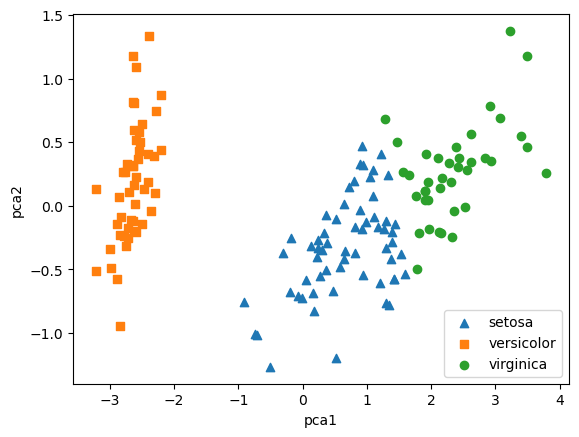

In [27]:
for i, m in enumerate(['^','s','o']):
    plt.scatter(iris_df[iris_df.pca_cluster==i].pca1,
               iris_df[iris_df.pca_cluster==i].pca2, 
                marker=m, label=iris.target_names[i])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.show()

-----